In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
X = data.iloc[:, [3,4]].values
X.shape

(200, 2)

In [40]:
from sklearn.cluster import KMeans

In [41]:
wcss = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i,init ='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

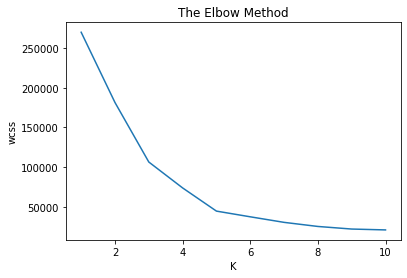

In [42]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('wcss')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(X)

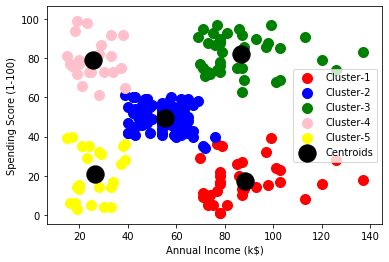

In [44]:
plt.scatter(X[y_kmeans==0 , 0], X[y_kmeans==0 , 1],s=100,color='red',label='Cluster-1')
plt.scatter(X[y_kmeans==1 , 0], X[y_kmeans==1 , 1],s=100, color='blue',label='Cluster-2')
plt.scatter(X[y_kmeans==2 , 0], X[y_kmeans==2 , 1],s=100, color='green',label='Cluster-3')
plt.scatter(X[y_kmeans==3 , 0], X[y_kmeans==3 , 1],s=100, color='pink',label='Cluster-4')
plt.scatter(X[y_kmeans==4 , 0], X[y_kmeans==4 , 1],s=100, color='yellow',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300,color='black',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()